In [15]:
import numpy as np
from time import time

def timer(func):
    def wrapperfunc(*args):
        t0 = time()
        res = func(*args)
        print("this took %1.3fs" % (time()-t0))
        return res
    return wrapperfunc


def memoize(func):
    """
    memoizing function wrapper
    """
    S = {}
    def wrapperfunction(*args):
        if args not in S:
            S[args] = func(*args)
        return S[args]
    return wrapperfunction

    

def constant(const = 1, min_n = 0, max_n=np.inf):
    """
    return function that gives series coefficent for the ith term

    c = const if min_n< = n<=max_n
    
    c = 0 else
    """
    def coeff(i):
        if i >= min_n and i <= max_n:
            return const
        else:
            return 0
    
    return coeff



def cauchy_2(a,b):
    """
    returns function that gives coefficient of the cauchy product of 
    two series with coefficients a(n) and b(n)
    
    (it's just the discrete convolution)
    """
    
    @memoize
    def coeff(i):
        return np.sum([a(h)*b(i-h) for h in range(i+1)])
    
    return coeff


@memoize
def cauchy(*args):
    """
    returns function that gives coefficient of the cauchy product of 
    many series with coefficients a(n) and b(n)
    
    (it's just the discrete convolution)
    
    Maximum recursion depth will be reached for products of too many series.
    
    Evaluation will also become slow.
    """
    if len(args) == 1:
        return args[0]
    
    else:
        return cauchy_2(args[0],cauchy(*args[1:]))

In [16]:
a = constant()
b = constant()

c = cauchy(a,b)

d = cauchy(*tuple(500*[a]))

for i in range(10):
    print(i,a(i),b(i),c(i),d(i))

0 1 1 1 1
1 1 1 2 500
2 1 1 3 125250
3 1 1 4 20958500
4 1 1 5 2635531375
5 1 1 6 265661562600
6 1 1 7 22359848185500
7 1 1 8 1616297597409000
8 1 1 9 102432860235795375
9 1 1 10 5781765888864894500


16.83288311958313


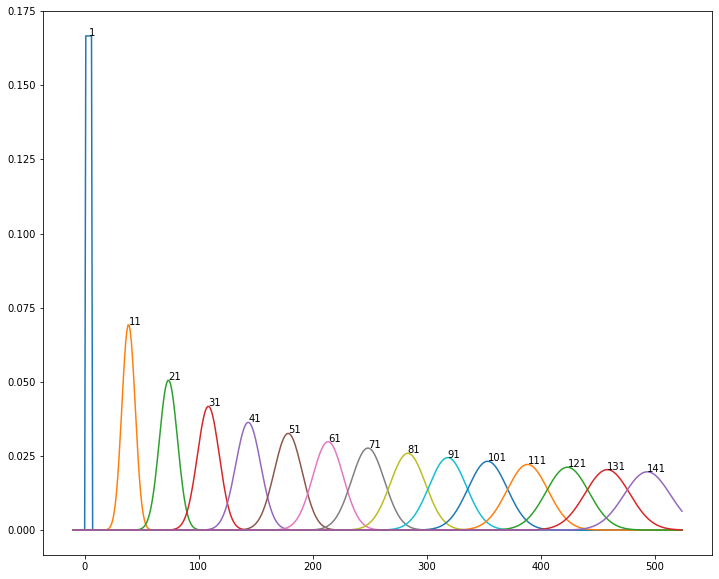

In [24]:
import matplotlib.pyplot as plt 



d6 = constant(const = 1/6, min_n=1,max_n=6)


N = 150

t0=time()
plt.figure(figsize=(12,10))
ss = list(range(-10,int(3.5*N)))
for n in range(1,N)[::10]:

    d = cauchy(*tuple(n*[d6]))

    p = [d(s) for s in ss]
    
    plt.plot(ss,p)
    plt.text(x=3.5*n,y=max(p),s=n)
    
    print(n,end='\r')
    
print(time()-t0)

# Integer Partitons

The famed partition funcions P(k,n), which give the number of ways in which an integer k can divided across n subsets.

Previously, the coefficients of the product of the generating functions was:

\begin{equation}
c_k = \sum_{l=0}^{k} a_l b_{k-l}
\end{equation}

This counts the number of multisets with $k$ elements. I.e., it counts $[a_k,b_0]$ as well as $[a_0,b_k]$. In order to only count the partitions, the unordered pair $[a_k,b_0]$ should only show up once. This is accomplished by modifying the limits of the generating function:

\begin{equation}
\sum_{i_0}^k a_i x^i \sum_{j_0}^k b_j x^j \rightarrow \sum_{i_0}^k a_i x^i \sum_{j_0}^i b_j x^j
\end{equation}

In [134]:
def partition_2(a,b):
    """
    returns function that gives coefficient of the cauchy product of 
    two series with coefficients a(n) and b(n) modified so that the second coefficient is always
    zero whenever its subscript is larger than the subscript of the first coefficient
    """
    
    f = lambda i,h: 1 if i-h <= h else 0
    
    @memoize
    def coeff(i):
        return np.sum([a(h)*b(i-h)*f(i,h) for h in range(i+1)])
    
    return coeff


@memoize
def partition_n(*args):
    """
    input: number of partitions n
    returns: function p_n(k) that gives number of partitions of an integer k into n. 
    """
    if type(args[0]) == int:
        return partition_n(*tuple(args[0]*[constant()]))
        
    else:
        if len(args) == 1:
            return args[0]

        else:
            return partition_2(args[0],partition_n(*args[1:]))
        
        
@memoize
def partition(k,n):
    assert n > 0
    d = partition_n(n)
    return d(k)

In [136]:
N = 16
print(''.join(['\t']+['k=%i\t' % n for n in range(1,N)]))
for n in range(1,N):
    print('\t'.join(['n=%i' % n]+['%i' % partition(k,n) for k in range(1,N)]))

	k=1	k=2	k=3	k=4	k=5	k=6	k=7	k=8	k=9	k=10	k=11	k=12	k=13	k=14	k=15	
n=1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1
n=2	1	2	2	3	3	4	4	5	5	6	6	7	7	8	8
n=3	1	2	2	4	4	6	6	9	9	12	12	16	16	20	20
n=4	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=5	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=6	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=7	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=8	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=9	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=10	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=11	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=12	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=13	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=14	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26
n=15	1	2	2	4	4	6	6	10	10	14	14	20	20	26	26


In [172]:
N = 40
P = np.zeros([int(N/2),N])

for i in range(int(N/2)):
    n = i+1
    for j in range(N):
        k = j+1
        
        P[i,j] = partition(k,n)

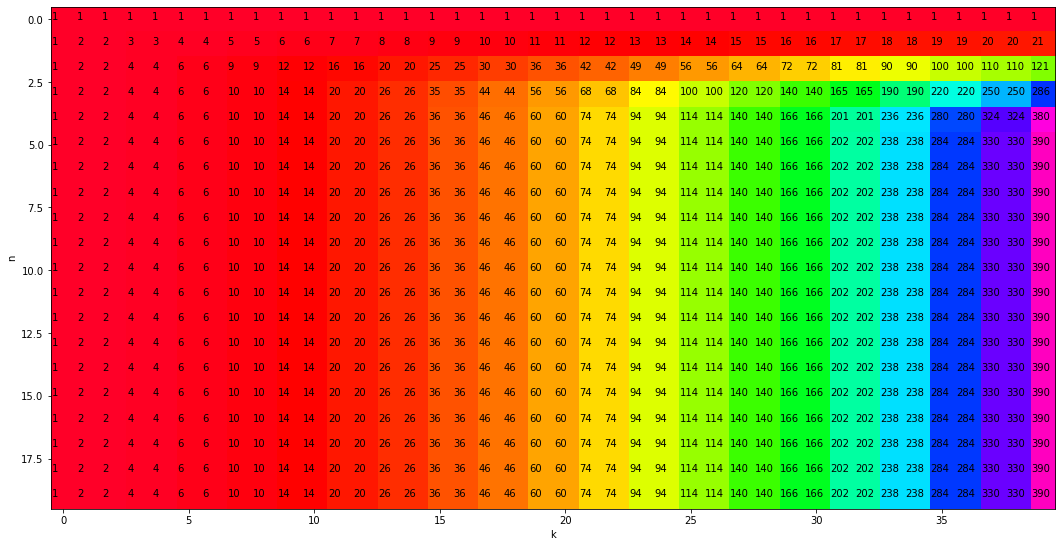

In [219]:
plt.figure(figsize=(18,18))
plt.imshow(P,cmap='gist_rainbow')
plt.xlabel('k')
plt.ylabel('n')

for i in range(int(N/2)):
    for j in range(N):
        plt.text(x=j-0.45,y=i,s=str(int(P[i,j])))

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'